### import libraries

In [30]:
import pandas as pd
import numpy as np
import nltk
import re

### import dataset

In [31]:
!wget https://raw.githubusercontent.com/itsNV/Language_Detection_Model/refs/heads/main/language.csv

--2026-02-03 06:20:39--  https://raw.githubusercontent.com/itsNV/Language_Detection_Model/refs/heads/main/language.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12989063 (12M) [text/plain]
Saving to: ‘language.csv.1’

language.csv.1      100%[===================>]  12.39M  --.-KB/s    in 0.1s    

2026-02-03 06:20:40 (122 MB/s) - ‘language.csv.1’ saved [12989063/12989063]



In [32]:
data = pd.read_csv('language.csv')
data.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


### Preprocessing

#### null values

In [33]:
data.isnull().sum()

,0
Text,0
language,0


### Converting Word to Vector ( BOW )

In [34]:
X = data['Text']
y = data['language']

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_new = cv.fit_transform(X)



In [36]:
X_new

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 913598 stored elements and shape (22000, 277720)>

### train test split

In [37]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.2,random_state=42)

### Model ( Naive bayes )

In [38]:
from sklearn.naive_bayes import MultinomialNB     ## for numerical data classification

mnb = MultinomialNB()

#### train model

In [39]:
mnb.fit(X_train,y_train)

MultinomialNB()

### Predict

In [40]:
y_pred = mnb.predict(X_test)

### Evaluation Metrics

#### Classification Report


In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       202
     Chinese       0.95      0.50      0.66       201
       Dutch       0.98      0.98      0.98       230
     English       0.70      1.00      0.82       194
    Estonian       0.99      0.95      0.97       200
      French       0.94      0.99      0.97       188
       Hindi       1.00      0.99      0.99       208
  Indonesian       1.00      0.98      0.99       213
    Japanese       0.68      0.88      0.76       194
      Korean       1.00      0.99      0.99       190
       Latin       0.98      0.90      0.94       210
     Persian       1.00      0.99      1.00       196
   Portugese       1.00      0.96      0.98       194
      Pushto       1.00      0.96      0.98       196
    Romanian       0.99      0.98      0.98       197
     Russian       0.99      0.99      0.99       213
     Spanish       0.98      0.99      0.99       199
     Swedish       0.99    

#### Confusion Matrix

Text(0, 0.5, 'Predicted values')

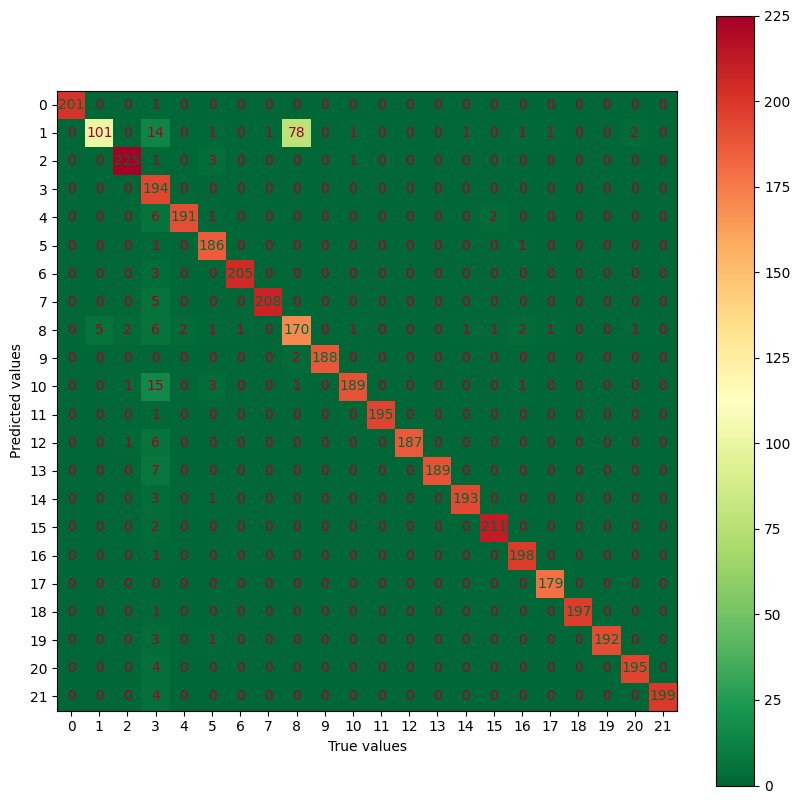

In [60]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test,y_pred)


fig,ax = plt.subplots(figsize=(10,10))
disp= ConfusionMatrixDisplay( cm)
disp.plot(cmap='RdYlGn_r',ax=ax)


plt.xlabel("True values")
plt.ylabel('Predicted values')


### Working Model

In [29]:
user = input('Enter the text : ')
vect = cv.transform([user]).toarray()
result = mnb.predict(vect)[0]
result

Enter the text : Hello ji how are you


np.str_('English')